In [1]:
import pandas as pd


In [2]:
data=pd.read_csv(r'D:\MUKUL ML\kaggle\titanic challenge\train.csv')

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
data.shape

(891, 12)

In [6]:
data["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [7]:
data["SibSp"].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [8]:
data["Pclass"].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

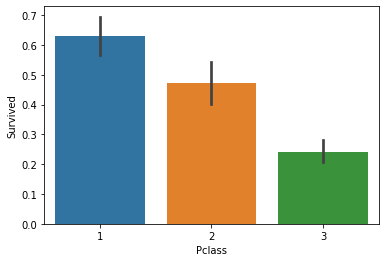

In [9]:
import seaborn as sns
sns.barplot(x="Pclass",y="Survived",data=data)

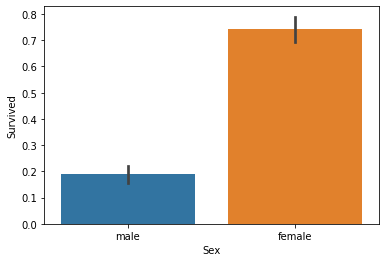

In [10]:
sns.barplot(x="Sex",y="Survived",data=data)

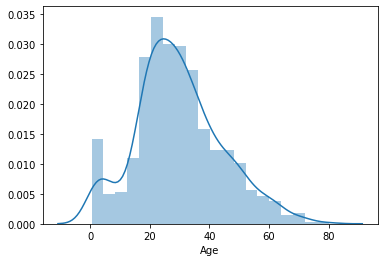

In [12]:
sns.distplot(data['Age'].dropna(),kde=True)

In [15]:
data["Age"].mean(),data["Age"].median(),data["Age"].max(),data["Age"].min()

(29.69911764705882, 28.0, 80.0, 0.42)

In [16]:
data.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


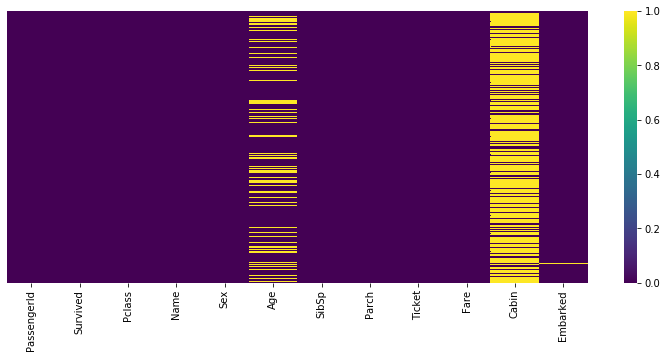

In [20]:
import matplotlib.pyplot as plt
plt.figure(figsize=(13,5))
sns.heatmap(data.isnull(),yticklabels=False,cmap="viridis")

In [22]:
data["Age"].isnull().sum()

177

In [23]:
data["Cabin"].isnull().sum()

687

In [31]:
data["Title"]=data["Name"].str.extract('([A-Za-z]+)\.',expand=False)

In [32]:
data["Name"]

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [33]:
data["Title"]=data["Title"].replace(['Capt', 'Col', 'Don', 'Dr', 'Major','Rev','Jonkheer','Dona'],"Rare")
data['Title'] = data['Title'].replace(['Countess','Sir','Lady'],'Royal')
data['Title'] = data['Title'].replace('Mlle','Miss')
data['Title'] = data['Title'].replace('Ms', 'Miss')
data['Title'] = data['Title'].replace('Mme','Mrs')

In [36]:
data[['Title','Age']].groupby('Title').mean()

,Age
Title,
Master,4.574167
Miss,21.845638
Mr,32.368090
Mrs,35.788991
Rare,45.894737
Royal,43.333333


In [39]:
for i in data["Title"]:
    if i=="Master":
        data["Age"]=data["Age"].fillna(4)
    if i =="Miss":
        data["Age"]=data["Age"].fillna(22)
    if i =="Mr":
        data["Age"]=data["Age"].fillna(32)
    if i =="Mrs":
        data["Age"]=data["Age"].fillna(36)
    if i =="Rare":
        data["Age"]=data["Age"].fillna(45)
    if i =="Royal":
        data["Age"]=data["Age"].fillna(43)

In [40]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Titile           0
Title            0
dtype: int64

In [41]:
data[["Title","Age"]].groupby("Title").mean()

,Age
Title,
Master,7.316750
Miss,23.821622
Mr,32.283366
Mrs,35.277778
Rare,45.200000
Royal,43.333333


In [42]:
data[["Pclass","Fare"]].groupby("Pclass").mean()


,Fare
Pclass,
1,84.154687
2,20.662183
3,13.675550


In [43]:
data["Cabin"].shape

(891,)

In [45]:
data['N_cabin']=data["Cabin"].notnull().astype('int')

In [46]:
data=data.drop('Cabin',axis=1)

In [47]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Titile,Title,N_cabin
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Mr,Mr,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Mrs,Mrs,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss,Miss,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Mrs,Mrs,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Mr,Mr,0


In [48]:
data=data.drop("Titile",axis=1)

In [49]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,N_cabin
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Mr,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Mrs,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Mrs,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Mr,0


In [51]:
data["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [53]:
data["Embarked"]=data["Embarked"].fillna('S')

In [54]:
sex_mapping={'male':1,'female':0}
data["Sex"]=data["Sex"].map(sex_mapping)

In [57]:
data[["Title","Survived"]].groupby(["Title"], as_index=False).mean().sort_values("Survived")

,Title,Survived
2,Mr,0.156673
4,Rare,0.250000
0,Master,0.575000
1,Miss,0.702703
3,Mrs,0.793651
5,Royal,1.000000


In [58]:
Title_mapping = {'Mr': 1,'Rare': 2,'Master': 3,'Miss': 4,'Mrs': 5,'Royal': 6}


data["Title"]=data["Title"].map(Title_mapping)


In [60]:
for i in data["Name"]:
    data["Name"]=data["Name"].replace(i,len(i))

In [61]:
import numpy as np
np.inf

inf

In [62]:
bins=[0,25,40,np.inf]
name_labels=['s_name','m_name','l_name']
data['Name_len']=pd.cut(data["Name"],bins,labels=name_labels)

In [63]:
data["Name_len"].value_counts()

s_name    458
m_name    343
l_name     90
Name: Name_len, dtype: int64

In [64]:
data[['Name_len','Survived']].groupby('Name_len').mean()

,Survived
Name_len,
s_name,0.275109
m_name,0.419825
l_name,0.800000


In [65]:
name_mapping = {'s_name':1, 'm_name':2, 'l_name':3}

data['Name_len'] = data['Name_len'].map(name_mapping)

In [66]:
data= data.drop(['Name', 'PassengerId'], axis=1)


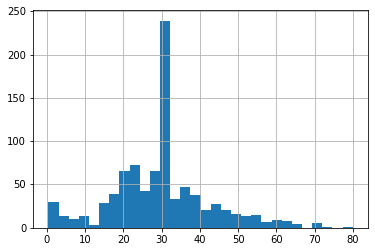

In [67]:
data["Age"].hist(bins=30)

In [68]:
bins = [0,5,12,18,24,35,60,np.inf]
Age_label = ['Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Senior']

data['AgeGroup'] = pd.cut(data['Age'], bins, labels = Age_label)

In [69]:
data[['AgeGroup', 'Survived']].groupby('AgeGroup').mean()


,Survived
AgeGroup,
Baby,0.704545
Child,0.360000
Teenager,0.428571
Student,0.347826
Young Adult,0.355164
Adult,0.400000
Senior,0.227273


In [70]:
age_mapping = {'Baby':1, 'Child':2, 'Teenager':3, 'Student':4, 
               'Young Adult':5,'Adult':6, 'Senior':7}


data['AgeGroup'] = data['AgeGroup'].map(age_mapping)


In [71]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,N_cabin,Name_len,AgeGroup
0,0,3,1,22.0,1,0,A/5 21171,7.2500,S,1,0,1,4
1,1,1,0,38.0,1,0,PC 17599,71.2833,C,5,1,3,6
2,1,3,0,26.0,0,0,STON/O2. 3101282,7.9250,S,4,0,1,5
3,1,1,0,35.0,1,0,113803,53.1000,S,5,1,3,5
4,0,3,1,35.0,0,0,373450,8.0500,S,1,0,1,5


In [72]:
data['FareBand'] = pd.qcut(data['Fare'], 8, labels = [1,2,3,4,5,6,7,8])


In [73]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,N_cabin,Name_len,AgeGroup,FareBand
0,0,3,1,22.0,1,0,A/5 21171,7.2500,S,1,0,1,4,1
1,1,1,0,38.0,1,0,PC 17599,71.2833,C,5,1,3,6,8
2,1,3,0,26.0,0,0,STON/O2. 3101282,7.9250,S,4,0,1,5,3
3,1,1,0,35.0,1,0,113803,53.1000,S,5,1,3,5,7
4,0,3,1,35.0,0,0,373450,8.0500,S,1,0,1,5,3


In [74]:
from sklearn.preprocessing import MinMaxScaler
ms=MinMaxScaler()
data['Fare']=ms.fit_transform(data['Fare'].values.reshape(-1,1))

In [75]:
data['Age']=ms.fit_transform(data['Fare'].values.reshape(-1,1))

In [76]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,N_cabin,Name_len,AgeGroup,FareBand
0,0,3,1,0.014151,1,0,A/5 21171,0.014151,S,1,0,1,4,1
1,1,1,0,0.139136,1,0,PC 17599,0.139136,C,5,1,3,6,8
2,1,3,0,0.015469,0,0,STON/O2. 3101282,0.015469,S,4,0,1,5,3
3,1,1,0,0.103644,1,0,113803,0.103644,S,5,1,3,5,7
4,0,3,1,0.015713,0,0,373450,0.015713,S,1,0,1,5,3


In [77]:
data['FamilySize'] = data['SibSp']+data['Parch']+1


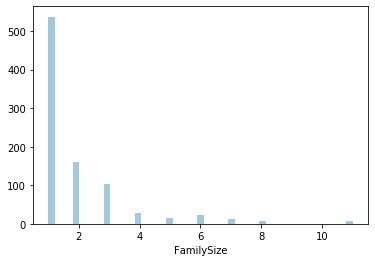

In [78]:
sns.distplot(data['FamilySize'],kde=False)

In [79]:
data=data.drop('Ticket',axis=1)

In [80]:
for dataset in data:
    data['Single'] = 0
    data.loc[data['FamilySize'] == 1, 'Single'] = 1

In [81]:
data[['Single', 'Survived']].groupby(['Single'], as_index=False).mean()


,Single,Survived
0,0,0.505650
1,1,0.303538


In [82]:
data = data.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)


In [87]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data['Embarked'] = le.fit_transform(data['Embarked'])

In [88]:
data.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,N_cabin,Name_len,AgeGroup,FareBand,Single
0,0,3,1,0.014151,0.014151,2,1,0,1,4,1,0
1,1,1,0,0.139136,0.139136,0,5,1,3,6,8,0
2,1,3,0,0.015469,0.015469,2,4,0,1,5,3,1
3,1,1,0,0.103644,0.103644,2,5,1,3,5,7,0
4,0,3,1,0.015713,0.015713,2,1,0,1,5,3,1


In [89]:
x=data.drop('Survived',axis=1)
y=data['Survived']

In [90]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=42)

In [93]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(xtrain, ytrain)
ypred = logreg.predict(xtest)
acc_logreg = round(logreg.score(xtrain, ytrain) * 100, 2)
acc_logreg

82.3

In [95]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier()
gbc.fit(xtrain, ytrain)
y_pred = gbc.predict(xtest)
acc_gbc = round(gbc.score(xtrain, ytrain) * 100, 2)
acc_gbc

90.31

In [96]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(xtrain, ytrain)
y_pred = rfc.predict(xtest)
acc_rfc = round(rfc.score(xtrain, ytrain)* 100, 2)
acc_rfc

96.91